In [1]:
import numpy as np
import scipy as scipy
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
import time
import peakutils
import seaborn



%matplotlib inline

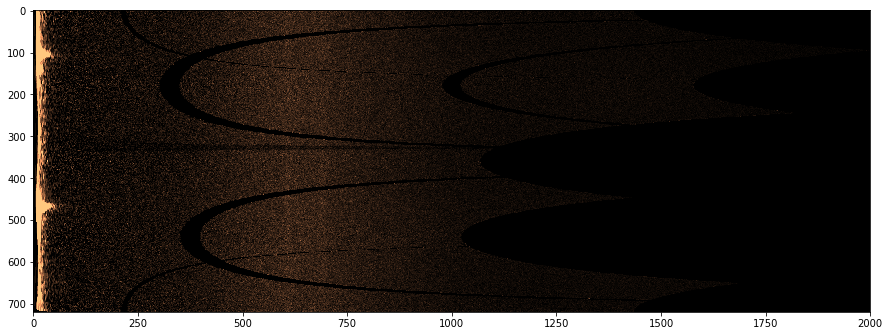

In [371]:
scan = np.load('test_scan.npy')
plt.figure(figsize=(15,10))
plt.imshow(scan, cmap = 'copper', clim = (0.00001, 5))

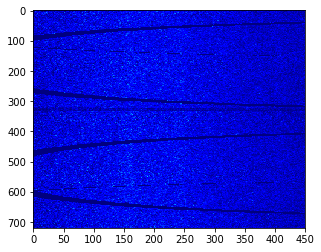

In [372]:
scan_roi = scan[:,450:900] #570-730 = both peaks
plt.imshow(scan_roi, cmap = 'jet', aspect = 0.5, clim = (0, 8)) 

In [373]:
#cleaning the scan up

count = 0
for i in range (scan_roi.shape[0]):
    profile = scan_roi[i]
    if (not np.any(profile<0)  and i not in range (330,360)):
        count +=1

clean_scan = np.zeros((count, scan_roi.shape[1]), dtype=np.float32)    
print(clean_scan.shape)
print(scan_roi.shape)


(350, 450)
(720, 450)


In [374]:
clean_count = 0

for i in range (scan_roi.shape[0]):
    profile = scan_roi[i]
    if (not np.any(profile<0)):
        clean_scan[clean_count]=profile
        clean_count +=1
        

IndexError: index 350 is out of bounds for axis 0 with size 350

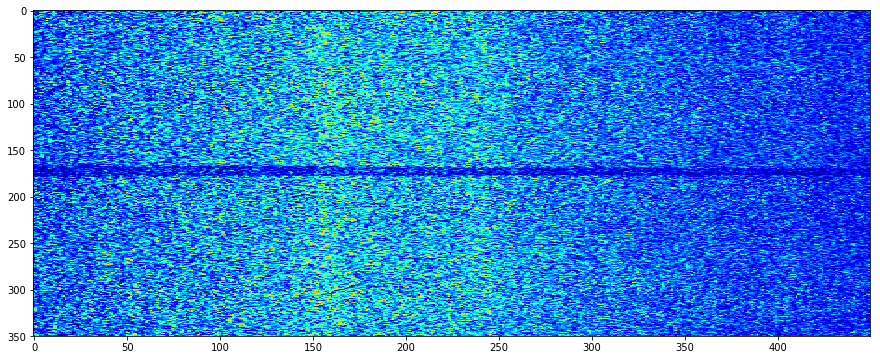

In [375]:
plt. figure(figsize=(15,10))
plt.imshow(clean_scan, cmap = 'jet', aspect = 0.5)

In [376]:
new_clean_scan = np.concatenate((clean_scan[:150], clean_scan[200:]), axis = 0)

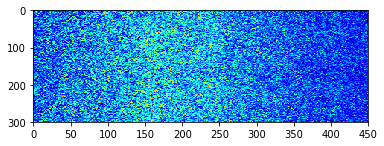

In [377]:
plt.imshow(new_clean_scan, cmap = 'jet', aspect = 0.5)

In [378]:
plt.imsave('clean.png', new_clean_scan)

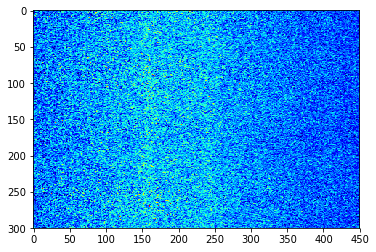

In [379]:
import cv2
from cv2_rolling_ball import subtract_background_rolling_ball

original = cv2.imread(f'clean.png', 0)
#blur = cv2.bilateralFilter(img,10,35,35)

plt.imshow(original, cmap = 'jet')


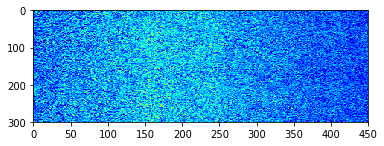

In [396]:
original = cv2.imread(f'clean.png', 0)
plt.imshow(original, cmap = 'jet', aspect = 0.5)

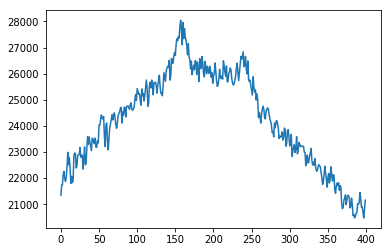

In [397]:
profile_sum = np.zeros(original.shape[1], dtype=np.float32) 

for profile in original:
    profile_sum+=profile
    
plt.plot(profile_sum[:-50])

In [398]:
r = 80

img, background = subtract_background_rolling_ball(original, r, light_background=False,
                                    use_paraboloid=False, do_presmooth=True)

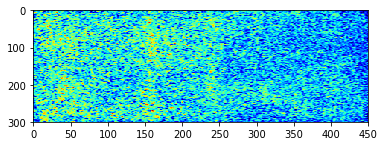

In [399]:
plt.imshow(img, cmap = 'jet', aspect = 0.5)
plt.imsave('rolled'+str(r)+'.png', img)

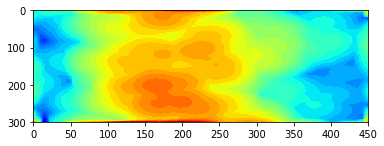

In [400]:
plt.imshow(background, cmap = 'jet', aspect = 0.5)

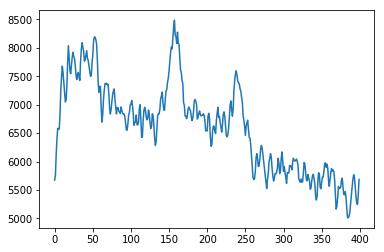

In [401]:
profile_sum = np.zeros(original.shape[1], dtype=np.float32) 

for profile in original:
    profile_sum+=profile
    
plt.plot(profile_sum[:-50])

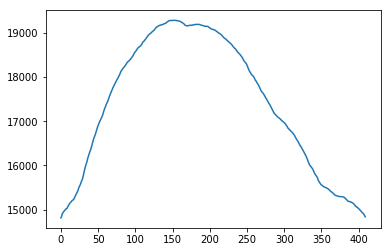

In [402]:
profile_sum = np.zeros(original.shape[1], dtype=np.float32) 

for profile in background:
    profile_sum+=profile
    
plt.plot(profile_sum[20:-20])

In [395]:
#Loading pre-processed profiles

q_ROI = (570,650)
chi_ROI = (0,720)

q_set = np.load('q_set.npy')
profile = np.load('1434profile.npy')

In [2]:
map_data = np.load('72trapz_map_data.npy')
#mask_data = np.load('1434mask_data.npy')

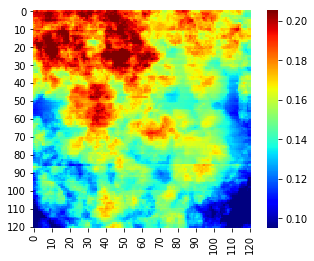

In [3]:
mesh = seaborn.heatmap(map_data, cmap = 'jet', robust = True, square = True, xticklabels = 10 , yticklabels = 10)